# K-Means Clustering
### Weekly Meeting ML Demo 01 (10-12)
---



## **K-means Clustering:**

Clustering algorithms work to seperate data into groups based on the similarity between samples. The **k-means** algorithm takes **`N`** data points and divides them into **`K`** groups by assigning points to the nearest centriod in euclidean space. 

We start by assigning centriods to pseudo-random samples in our set, then assign each point in the set to the nearest centroid. This initialization creates our first clusters of data, but they are assigned with no great significance yet. We run the same process again, but the centroids are represented by the mean of each group. 

We'll implement this algorithm in:
- `tensorflow`
- `scikit`
- `numpy` (from scratch)

In [3]:
# Start by installing the nessecary Python modules
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 320.4 MB 9.7 MB/s 
     |████████████████████████████████| 65 kB 1.0 MB/s 
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
Processing /home/stephen/.cache/pip/wheels/32/42/7f/23cae9ff6ef66798d00dc5d659088e57dbba01566f6c60db63/wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl
     |████████████████████████████████| 6.8 MB 6.8 MB/s 
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 3.8 MB 4.3 MB/s 
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 127 kB 16.8 MB/s 
     |████████████████████████████████| 459 kB 10.7 MB/s 
     |████████████████████████████████| 2.9 MB 7.7 MB/s 
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached google_auth_oauthlib-

## Preparation


### Imports
- **`Numpy`:** Fantastic Vector and Matrix operations and storage.
- **`Pandas`:** Efficient and clean formatting for data 'grids.'
- **`Matplotlib`:** Popular library for visualizing data.
- **`Tensorflow`:** Machine Learning library with K-means model. 



### Parameters
- `numPoints`: The number of points we want to cluster.
- `clustersK`: Number of clusters to parse our sample points into.

# Scikit-Learn

Scikit is a commonly used machine learning library with plenty of built-in functionality that we'll use today.

Scikit has the simplest kmeans function built-in. All we need is a number of sample points, and a number of clusters. 

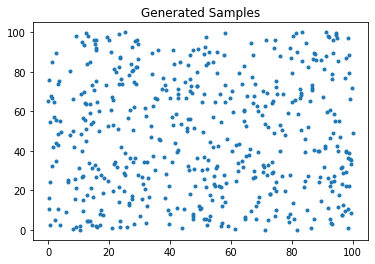

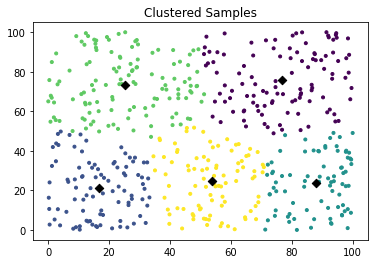

In [7]:
import numpy as np # Basic Python math library
import matplotlib.pyplot as plt # For plotting data

from sklearn.cluster import KMeans


# Sample Space Size
numPoints = 500
# Number of clusters to parse
clustersK = 5

# Generate coordinate (x,y) points over a normal distribution with values 0-100 
points = np.random.uniform(0, 100, [numPoints, 2])

# Plot the generated set.
plt.scatter(points[:,0], points[:,1], marker='.')
plt.title("Generated Samples")
plt.show()

# Call the KMeans function, and run on sample space (points) for set clusters
kmeans = KMeans(n_clusters=clustersK).fit(points)

# We can plot the results with matplotlib, coloring each point with the respective cluster ID. Centroids indicated with diamonds.
plt.scatter(points[:,0], points[:,1], c=kmeans.labels_, marker='.')
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='black', marker='D')
plt.title("Clustered Samples")
plt.show()


# Tensorflow

Tensorflow is Google's API for machine learning. The functionality outpreforms `scikit-learn`, but will require a little more setup.

We're going to use `tensorflow`'s `KMeans` function, but now we'll be able to see how our clusters update over each iteration.

Call the clustering algorithm at your own pace by re-running `Block 3` to update clusters and centroids one step at a time. 

- **`Block 1`:** Set up Parameters, Generate Sample Points, Compile KMeans Model
- **`Block 2`:** Runs a single clustering iteration. To update centroids and re-assign points, simply re-run!

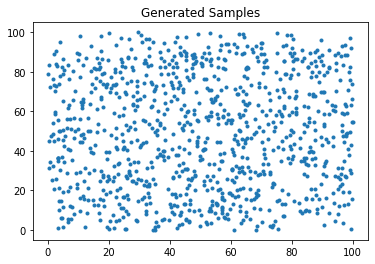

In [25]:
import numpy as np # Basic Python math library
import pandas as pd # Used to display metrics
import matplotlib.pyplot as plt # For plotting data

import tensorflow as tf 
tf.get_logger().setLevel('ERROR') # Here, we silence some tensorflow environment info printing.

# Sample Space Size
numPoints = 1000
# Number of clusters to parse
clustersK = 5

# Generate a random normal distribution of (x,y) coordinate points. 
points = np.random.uniform(0, 100, [numPoints, 2])

# Plot the generated set.
plt.scatter(points[:,0], points[:,1], marker='.')
plt.title("Generated Samples")
plt.show()


# Declare function to prepare our points as input for the k-means model. 
def input_fn(): 
  return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

# Build the k-means clustering model from tensorflow.
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=clustersK, use_mini_batch=False)

# Used for plotting, do not edit!
iter_idx = 0

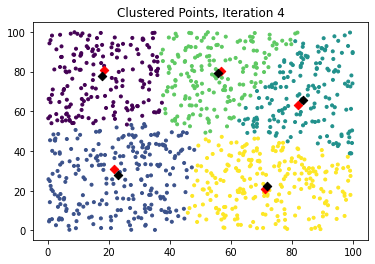

Iteration Report:
    Cluster  Points                 Center
 Cluster 01     176  (17.883226, 77.53083)
 Cluster 02     243  (22.98878, 27.757391)
 Cluster 03     170   (83.51255, 65.66516)
 Cluster 04     177   (55.71824, 79.40551)
 Cluster 05     234  (71.79443, 22.463531)


In [24]:
# Block 2 - Execute Clustering Iteratively

""" Execute k-means clustering operation over our generated point set. """
kmeans.train(input_fn)

""" After assigning labels to each of our points, we update the coordinates that represent each of our centroids. """
cluster_centers = kmeans.cluster_centers()

""" map the input points to their clusters """
cluster_indices = list(kmeans.predict_cluster_index(input_fn))

""" We can produce this iteration's clusters with matplotlib, coloring each point with the previously assigned hexcodes.""" 
plt.scatter(points[:,0], points[:,1], c=cluster_indices, marker='.')
if iter_idx != 0:
    plt.scatter(x=prev_centers[:,0], y=prev_centers[:,1], c='red', marker='D')
plt.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], c='black', marker='D')
plt.title("Clustered Points, Iteration {}".format(iter_idx))
plt.show()

""" Then, we pull some information on each of the groups, printing them cleanly with pandas. """
report = pd.DataFrame({
    'Cluster': ['Cluster {:02}'.format(i+1) for i in range(clustersK)],
    'Points': [cluster_indices.count(i)     for i in range(clustersK)],
    'Center': [tuple(cluster_centers[i])    for i in range(clustersK)]},
    index=None)


print("Iteration Report:")
print(report.to_string(index=False))

prev_centers = cluster_centers
iter_idx += 1


# Below, you will see the iteration results.
# On the first iteration, our centroids are randomly assigned; you'll see these in BLACK.
# Subsequent runs will show previous centroids in RED, so you can see how the clusters update.  
# To update, run this block again. 
# You'll know the clustering is successful when the red and black markers allign.


## Cluster Function (Tensorflow)

We'll use the code above to declare a k-means function that takes simple inputs and runs the k-means function over a set number of iterations.

We call the function `iterateKMeans()`.
It does nothing when we create it, so we must call the function below on our generated set of coordinate points. 

In [30]:
def iterateKMeans(clustersK, limit, data):
    """
    We can provide this function:

    clustersK: number of clusters to group 
    limit: number of iterations to run the k-means 
    points: sample set of 2d coordinate points
    
    and it will run the k-means and print all iterations.
    """
 
    def input_fn(): 
        return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)
    
    kmeans = tf.compat.v1.estimator.experimental.KMeans(
        num_clusters=clustersK, use_mini_batch=False)

    # Prepare dict for report
    iterationReport = {'Step': list(range(limit))}
    for c_idx in range(clustersK):
        iterationReport.update({'Cluster {}'.format(c_idx+1): []})

    # prepare fig
    fig, axs = plt.subplots(1, limit, figsize=(4*limit, 3.6))
    for iter_idx in range(limit):

        # apply clustering
        kmeans.train(input_fn)
        cluster_centers = kmeans.cluster_centers()
        cluster_indices = list(kmeans.predict_cluster_index(input_fn))

        # plot
        axs[iter_idx].scatter(points[:,0], points[:,1], c=cluster_indices, marker='.')
        if iter_idx != 0:
            axs[iter_idx].scatter(x=prev_centers[:,0], y=prev_centers[:,1], c='red', marker='D')
        axs[iter_idx].scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], c='black', marker='D')

        # update dict for report
        for idx in range(clustersK):
            iterationReport['Cluster {}'.format(idx+1)].append("{} pts".format(cluster_indices.count(idx)))
        
        # save previous centers
        prev_centers = cluster_centers

    # plot collective iterations
    plt.suptitle("Clustering over Iterations")
    plt.show()

    # print report
    print("Report:")
    print(pd.DataFrame(iterationReport, index=None).to_string(index=False))


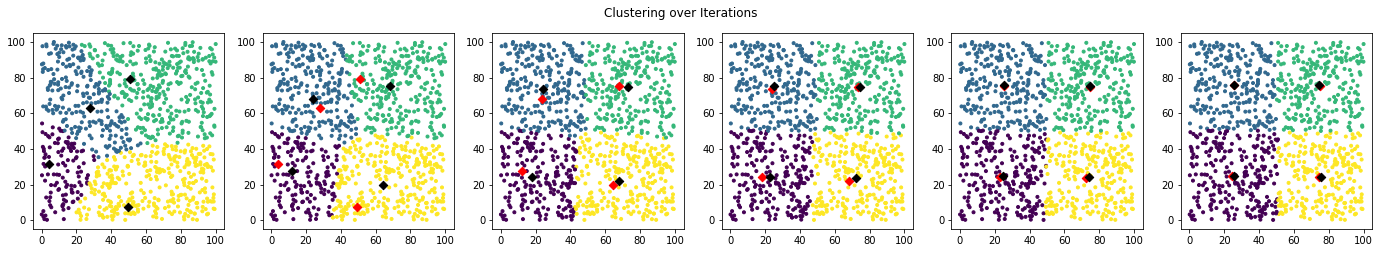

Report:
 Step Cluster 1 Cluster 2 Cluster 3 Cluster 4
    0   114 pts   222 pts   334 pts   330 pts
    1   160 pts   247 pts   280 pts   313 pts
    2   211 pts   251 pts   260 pts   278 pts
    3   232 pts   251 pts   251 pts   266 pts
    4   244 pts   250 pts   248 pts   258 pts
    5   254 pts   249 pts   248 pts   249 pts


In [31]:
""" Standard Normal Distribution """

# Generate a random normal distribution of (x,y) coordinate points. 
points = np.random.uniform(0, 100, [numPoints, 2])
iterateKMeans(clustersK=4, limit=6, data=points)

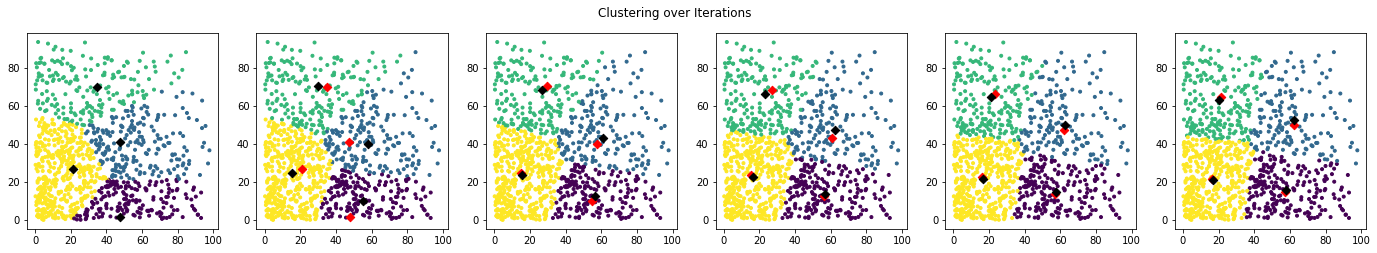

Report:
 Step Cluster 1 Cluster 2 Cluster 3 Cluster 4
    0   173 pts   203 pts   189 pts   435 pts
    1   181 pts   185 pts   195 pts   439 pts
    2   192 pts   178 pts   196 pts   434 pts
    3   207 pts   166 pts   205 pts   422 pts
    4   214 pts   160 pts   209 pts   417 pts
    5   218 pts   157 pts   212 pts   413 pts


In [32]:
""" Traingular Distribution """

points = np.random.triangular(0, 1, 100, [numPoints, 2])
iterateKMeans(clustersK=4, limit=6, data=points)

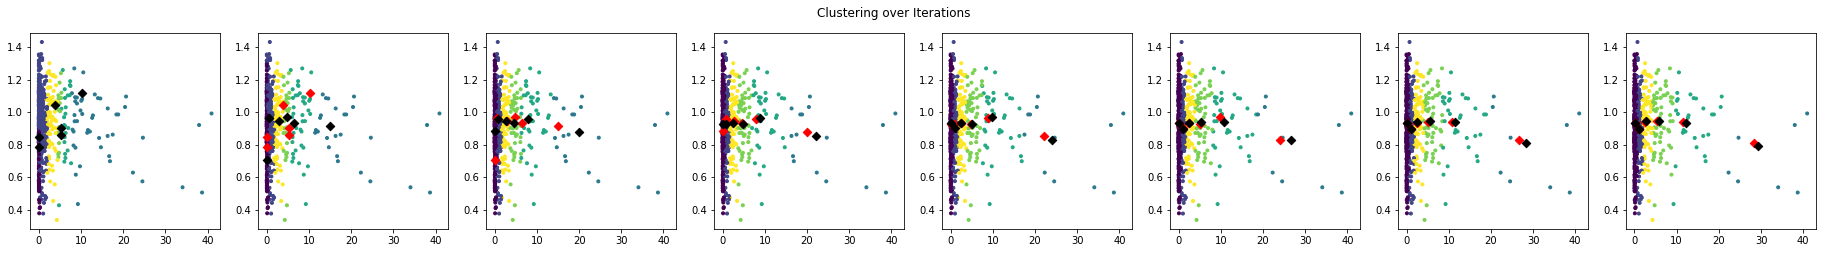

Report:
 Step Cluster 1 Cluster 2 Cluster 3 Cluster 4 Cluster 5 Cluster 6
    0    83 pts   446 pts    48 pts    25 pts    17 pts    81 pts
    1   255 pts   259 pts    26 pts    44 pts    32 pts    84 pts
    2   335 pts   173 pts    20 pts    40 pts    49 pts    83 pts
    3   361 pts   147 pts    16 pts    38 pts    55 pts    83 pts
    4   368 pts   141 pts    12 pts    38 pts    57 pts    84 pts
    5   371 pts   142 pts    10 pts    36 pts    58 pts    83 pts
    6   375 pts   143 pts     9 pts    32 pts    57 pts    84 pts
    7   384 pts   138 pts     7 pts    27 pts    60 pts    84 pts


In [33]:
""" Weibull Distribution """

points = np.random.weibull([0.5, 5.7], [700, 2])
iterateKMeans(clustersK=6, limit=8, data=points)

# Numpy

We can use the simple math library `numpy` to write the k-means clustering mostly from scratch. 

The functions below were written by [Florian LB](https://flothesof.github.io/k-means-numpy.html).

In [34]:

""" Declare the Kmeans components as callable functions. """

import numpy as np # One library only, for vector manipulation.

def init_centroids(points, k): # [2]
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids): # [2]
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

Text(0.5, 1.0, 'Lime: Sample Points\nBlack: Random Centroids')

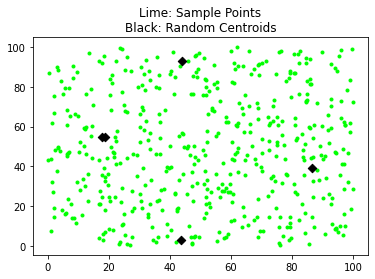

In [52]:
""" Normal Distribution """

# Define number of clusters
clustersK = 5

# Define number of points in the sample space
numPoints = 500

# Generate coordinate (x,y) points over a normal distribution with values 0-100 
points = np.random.uniform(0, 100, [numPoints, 2])

# Select Random Centroids
centroids = init_centroids(points, clustersK)
plt.scatter(x=points[:,0], y=points[:,1], c='lime', marker='.')
plt.scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='D')
plt.title("Lime: Sample Points\nBlack: Random Centroids")

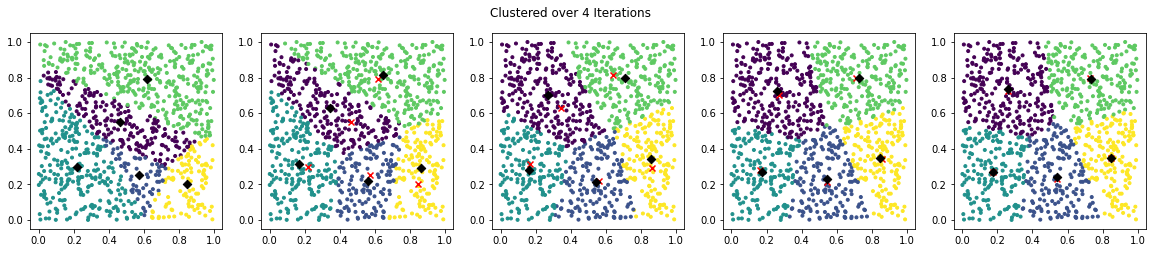

In [54]:
""" Now we can make a similar function to run the KMeans algorithm from scratch in python. """

def localKMeans(points, clustersK, iterations):
    # Initialize Random Centroids
    centroids = init_centroids(points, clustersK)

    fig, axs = plt.subplots(1, iterations, figsize=(4*iterations, 3.6))
    for iter_idx in range(iterations):

        # Update Clusters
        cluster_indices = closest_centroid(points, centroids)
        
        # Update Centroids
        prev_centroids = centroids
        centroids = move_centroids(points, cluster_indices, centroids)
        
        # Plot
        axs[iter_idx].scatter(points[:,0], points[:,1], c=cluster_indices, marker='.')
        if iter_idx != 0:
            axs[iter_idx].scatter(x=prev_centroids[:,0], y=prev_centroids[:,1], c='red', marker='x')
        axs[iter_idx].scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='D')
    
    plt.suptitle("Clustered over {} Iterations".format(iter_idx))
    plt.show()

numPoints = 1000
clustersK = 5

points = np.random.random([numPoints, 2])
localKMeans(points, clustersK, 5)
